# Principle Component Analysis

In [1]:
import pandas as pd 
import numpy as np
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#Use this file path for pc
#filepath = r"D:\gradschool\Capstone"
#Use this file path for mac 
filepath = r"/Users/jacksonjoyner/Desktop/MSBA/Capstone/UseThisData/"
os.chdir(filepath)

In [3]:
playerdf = pd.read_csv("ImpactScoreData.csv")
playerdf

FileNotFoundError: [Errno 2] No such file or directory: 'ImpactScoreData.csv'

Part of PCA is standardizing your data. The section below will standardize the data we are going to use.

Lets look at a pairs plot of our data for each pca we will be performing

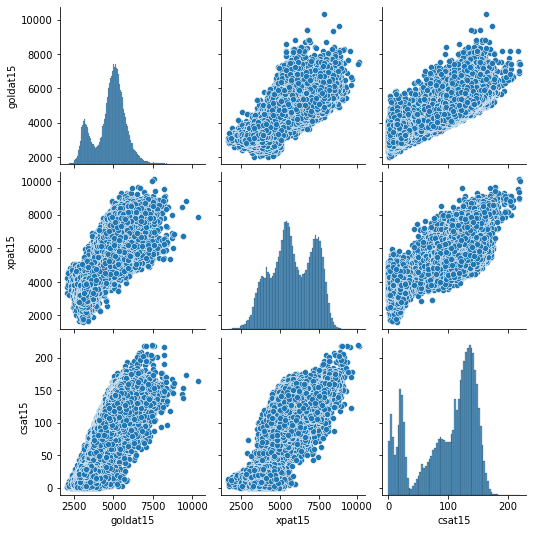

In [4]:
sns.pairplot(data = playerdf, vars=['goldat15','xpat15','csat15'])

In [11]:
features15 = ['goldat15','xpat15','csat15']
x = playerdf.loc[:,features15].values
y = playerdf.loc[:,["playername"]].values
x = StandardScaler().fit_transform(x)

Now that the data is standardized, we can perform a PCA on that data.

In [12]:
from sklearn.decomposition import PCA
#n_components should equal the total amount of components at the end
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
playerdf["PCA15"] = principalComponents
pca.explained_variance_ratio_


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

,goldat15,xpat15,csat15
count,92600.000000,92600.000000,92600.000000
mean,4799.104006,5829.930097,97.875464
std,954.419079,1395.459514,47.944084
min,2034.000000,1605.000000,0.000000
25%,4304.000000,4817.000000,66.000000
50%,4955.000000,5747.000000,115.000000
75%,5418.000000,7080.250000,136.000000
max,10353.000000,10115.000000,220.000000


We can attribute 86% of the variance in the three values with this priniciple component. 

Now lets try and work out another principle component, Gold and Damage Share

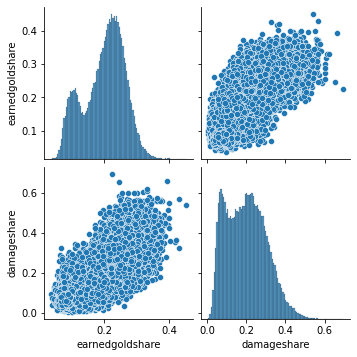

In [7]:
sns.pairplot(data = playerdf, vars=['earnedgoldshare','damageshare'])

In [6]:
featureshare= ["earnedgoldshare",'damageshare']
x = playerdf.loc[:,featureshare].values
y = playerdf.loc[:,["playername"]].values
x = StandardScaler().fit_transform(x)
#n_components should equal the total amount of components at the end
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
playerdf["PCAShare"] = principalComponents
pca.explained_variance_ratio_

array([0.89963874])

This PCAShare accounts to 89.9% of the variance between the two variables. 
Now lets look at the per minute variables

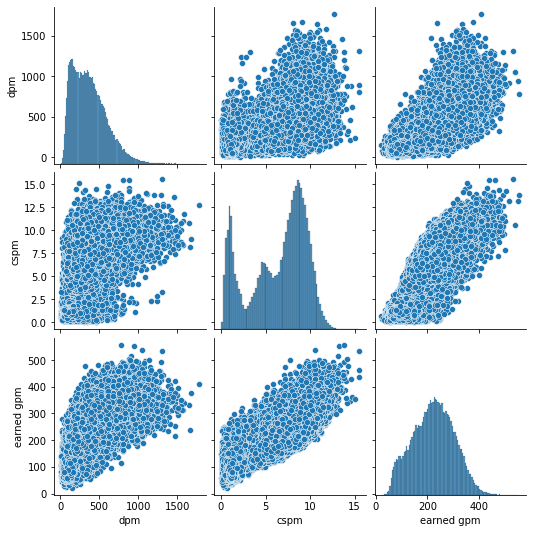

In [10]:
sns.pairplot(data = playerdf,vars = ['dpm','cspm','earned gpm'])

In [7]:
featureshare= ['earned gpm','cspm']
x = playerdf.loc[:,featureshare].values
y = playerdf.loc[:,["playername"]].values
x = StandardScaler().fit_transform(x)
#n_components should equal the total amount of components at the end
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
playerdf["PCApm"] = principalComponents
pca.explained_variance_ratio_

array([0.9186098])

In [15]:
playerdf

,league,year,split,date,side,playername,position,teamname,kills,deaths,...,D%,earnedgoldshare,damageshare,cspm,damagetakenperminute,earnedgold,earned gpm,PCA15,PCAShare,PCApm
0,EU LCS,2014,Spring,3/28/2014 16:14,Blue,fredy122,top,SK Gaming,0,3,...,0.136364,0.233888,0.266095,8.1509,926.4000,8884,201.1472,1.071165,0.851092,0.192018
1,EU LCS,2014,Spring,3/28/2014 16:14,Blue,Svenskeren,jng,SK Gaming,4,4,...,0.181818,0.168887,0.174089,3.5094,733.4717,6415,145.2453,-1.157427,-0.536872,-1.329622
2,EU LCS,2014,Spring,3/28/2014 16:14,Blue,Jesiz,mid,SK Gaming,1,3,...,0.136364,0.244866,0.284035,9.3057,576.5434,9301,210.5887,1.115521,1.102367,0.530580
3,EU LCS,2014,Spring,3/28/2014 16:14,Blue,CandyPanda,bot,SK Gaming,2,5,...,0.227273,0.254186,0.192568,8.1057,685.9698,9655,218.6038,-0.831752,0.566422,0.338479
4,EU LCS,2014,Spring,3/28/2014 16:14,Blue,nRated,sup,SK Gaming,1,7,...,0.318182,0.098173,0.083214,0.8377,528.8151,3729,84.4302,-2.931761,-1.982099,-2.462070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92595,LCS,2021,Spring,4/3/2021 21:32,Red,Alphari,top,Team Liquid,1,2,...,0.117647,0.220126,0.224882,8.6550,442.2690,7041,216.8686,1.414158,0.404612,0.443739
92596,LCS,2021,Spring,4/3/2021 21:32,Red,Santorin,jng,Team Liquid,1,4,...,0.235294,0.181831,0.093968,6.4066,773.9322,5816,179.1376,0.906147,-0.951782,-0.388794
92597,LCS,2021,Spring,4/3/2021 21:32,Red,Jensen,mid,Team Liquid,3,5,...,0.294118,0.246104,0.327698,7.7002,707.8029,7872,242.4641,1.724921,1.423113,0.463075
92598,LCS,2021,Spring,4/3/2021 21:32,Red,Tactical,bot,Team Liquid,1,3,...,0.176471,0.270988,0.295341,9.7023,284.8460,8668,266.9815,0.601493,1.479895,1.123052


It turns out, removing dpm from the PCA increases the accuracy by 10 percent. from 81.88 to 91.86

In [9]:
#Im making a csv to test the Logit Model with the new PC's
playerdf.to_csv("PCATest1.csv", index=False)